#📌 Extracción

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/kariguti/Challenge_TelecomX_Kari/main/TelecomX_Data.json'
datos_telecom = pd.read_json(url)

In [3]:
datos_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [4]:
# Normalizamos cada una de las columnas con diccionarios
customer_df = pd.json_normalize(datos_telecom['customer'])
phone_df    = pd.json_normalize(datos_telecom['phone'])
internet_df = pd.json_normalize(datos_telecom['internet'])
account_df  = pd.json_normalize(datos_telecom['account'])

In [5]:
# Unimos todo al DataFrame original (sin las columnas originales anidadas)
df_telecom_final = pd.concat([
    datos_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

In [6]:
df_telecom_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#📊 Carga y análisis

In [7]:
df_telecom_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [8]:
import numpy as np
df_telecom_final['Charges.Total'] = df_telecom_final['Charges.Total'].replace(' ', np.nan).astype(np.float64)

In [9]:
df_telecom_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
df_telecom_final.shape

(7267, 21)

In [11]:
df_telecom_final.describe(include='all')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000


In [12]:
df_telecom_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [13]:
#Si no tienen internet, no deberían tener OnlineSecurity, OnlineBackup, DeviceProtection, StreamingTV ni StreamingMovies
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

df_telecom_final[
    (df_telecom_final['InternetService'] == 'No') &
    (df_telecom_final[internet_services] != 'No').any(axis=1)
]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
20,0023-UYUPN,No,Female,1,Yes,No,50,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,25.20,1306.30
23,0030-FNXPP,No,Female,0,No,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,57.20
24,0031-PVLZI,Yes,Female,0,Yes,Yes,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35
27,0040-HALCW,No,Male,0,Yes,Yes,54,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.40,1090.60
28,0042-JVWOJ,No,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.60,471.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,9970-QBCDA,No,Female,0,No,No,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,129.55
7252,9972-EWRJS,No,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90
7256,9975-GPKZU,No,Male,0,Yes,Yes,46,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.75,856.50
7257,9975-SKRNR,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90


In [14]:
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

for col in internet_services:
    df_telecom_final[col] = df_telecom_final[col].replace('No internet service', 'No')

In [15]:
#Si un cliente lleva tiempo (tenure > 0), es raro que no haya pagado nada.
df_telecom_final[
    (df_telecom_final['tenure'] > 0) &
    (df_telecom_final['Charges.Total'] == 0)
]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [16]:
#Si un cliente no tiene servicio telefónico, no debería tener múltiples líneas.
df_telecom_final[
    (df_telecom_final['PhoneService'] == 'No') &
    (df_telecom_final['MultipleLines'] != 'No phone service')
]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [17]:
#Clientes con tenure = 0 pero Charges.Monthly > 0
df_telecom_final[
    (df_telecom_final['tenure'] == 0) &
    (df_telecom_final['Charges.Monthly'] > 0)
]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No,No,No internet service,No,No,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No,No,No internet service,No,No,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No,No,No internet service,No,No,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No internet service,No,No,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No internet service,No,No,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [18]:
# Verifica nuevamente inconsistencias
print(df_telecom_final.isnull().sum())

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [19]:
print(df_telecom_final.duplicated().sum())

0


In [20]:
df_telecom_final['Cuentas_Diarias'] = (
    df_telecom_final['Charges.Monthly'] / 30
).round(2)

In [21]:
df_telecom_final[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [22]:
# Lista de columnas con respuestas binarias
binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Reemplazo "Yes"/"No" por 1/0
df_telecom_final[binarias] = df_telecom_final[binarias].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-1532169153.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom_final[binarias] = df_telecom_final[binarias].replace({'Yes': 1, 'No': 0})


In [23]:
df_telecom_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [24]:
df_telecom_final.rename(columns={
    'Churn': 'Cancelado',
    'gender': 'Genero',
    'SeniorCitizen': 'EsAdultoMayor',
    'Partner': 'TienePareja',
    'Dependents': 'TieneDependientes',
    'tenure': 'AntiguedadMeses',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'LineasMultiples',
    'InternetService': 'TipoInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'TVStreaming',
    'StreamingMovies': 'CineStreaming',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturaElectronica',
    'PaymentMethod': 'MetodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'Cuentas_Diarias': 'CargoDiario'
}, inplace=True)

In [25]:
df_telecom_final.head()

,customerID,Cancelado,Genero,EsAdultoMayor,TienePareja,TieneDependientes,AntiguedadMeses,ServicioTelefonico,LineasMultiples,TipoInternet,...,ProteccionDispositivo,SoporteTecnico,TVStreaming,CineStreaming,TipoContrato,FacturaElectronica,MetodoPago,CargoMensual,CargoTotal,CargoDiario
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [26]:
# Revisar los valores únicos
print(df_telecom_final['Cancelado'].unique())

[0 1 '']


In [27]:
# Reemplazar valores no válidos por NaN y luego decidir qué hacer con ellos
df_telecom_final['Cancelado'] = pd.to_numeric(df_telecom_final['Cancelado'], errors='coerce')

# Ver cuántos valores nulos quedan
print(df_telecom_final['Cancelado'].isnull().sum())

224


In [28]:
df_telecom_final = df_telecom_final[df_telecom_final['Cancelado'].isin([0, 1])]

In [29]:
# Estadísticas básicas para columnas numéricas
df_telecom_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Cancelado,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00
EsAdultoMayor,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
TienePareja,7043.0,0.483033,0.499748,0.00,0.00,0.000,1.0000,1.00
TieneDependientes,7043.0,0.299588,0.458110,0.00,0.00,0.000,1.0000,1.00
AntiguedadMeses,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
ServicioTelefonico,7043.0,0.903166,0.295752,0.00,1.00,1.000,1.0000,1.00
SeguridadOnline,7043.0,0.286668,0.452237,0.00,0.00,0.000,1.0000,1.00
RespaldoOnline,7043.0,0.344881,0.475363,0.00,0.00,0.000,1.0000,1.00
ProteccionDispositivo,7043.0,0.343888,0.475038,0.00,0.00,0.000,1.0000,1.00
TVStreaming,7043.0,0.384353,0.486477,0.00,0.00,0.000,1.0000,1.00


In [30]:
# Media
media = df_telecom_final.mean(numeric_only=True)

# Mediana
mediana = df_telecom_final.median(numeric_only=True)

# Desviación estándar
desviacion = df_telecom_final.std(numeric_only=True)

# Mínimo y máximo
minimos = df_telecom_final.min(numeric_only=True)
maximos = df_telecom_final.max(numeric_only=True)

In [31]:
variables = ['AntiguedadMeses', 'CargoMensual', 'CargoTotal']

for var in variables:
    print(f"--- {var} ---")
    print("Media:", df_telecom_final[var].mean())
    print("Mediana:", df_telecom_final[var].median())
    print("Desviación estándar:", df_telecom_final[var].std())
    print("Mínimo:", df_telecom_final[var].min())
    print("Máximo:", df_telecom_final[var].max())
    print("Rango intercuartílico (IQR):",
          df_telecom_final[var].quantile(0.75) - df_telecom_final[var].quantile(0.25))
    print()

--- AntiguedadMeses ---
Media: 32.37114865824223
Mediana: 29.0
Desviación estándar: 24.559481023094225
Mínimo: 0
Máximo: 72
Rango intercuartílico (IQR): 46.0

--- CargoMensual ---
Media: 64.76169246059918
Mediana: 70.35
Desviación estándar: 30.09004709767855
Mínimo: 18.25
Máximo: 118.75
Rango intercuartílico (IQR): 54.349999999999994

--- CargoTotal ---
Media: 2283.3004408418656
Mediana: 1397.475
Desviación estándar: 2266.771361883145
Mínimo: 18.8
Máximo: 8684.8
Rango intercuartílico (IQR): 3393.2875000000004



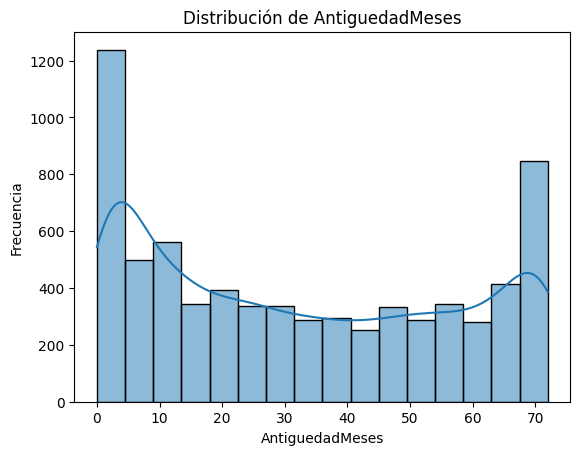

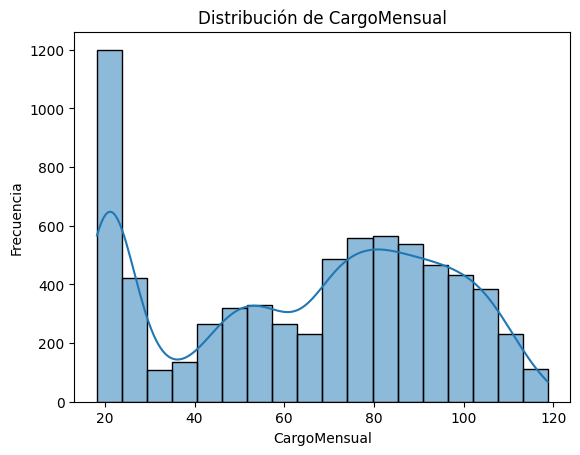

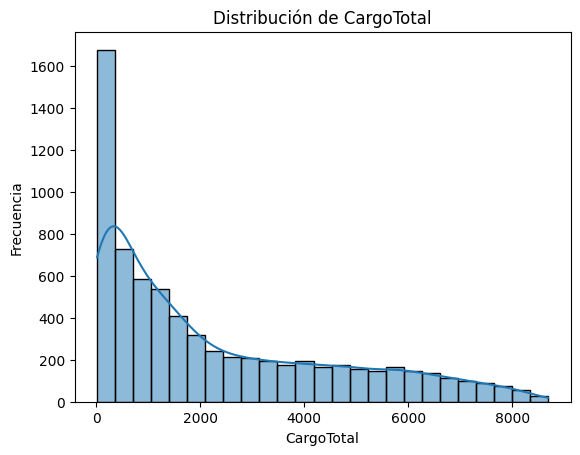

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in variables:
    sns.histplot(df_telecom_final[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

/tmp/ipython-input-3721569375.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_telecom_final, x='Cancelado', palette='pastel')


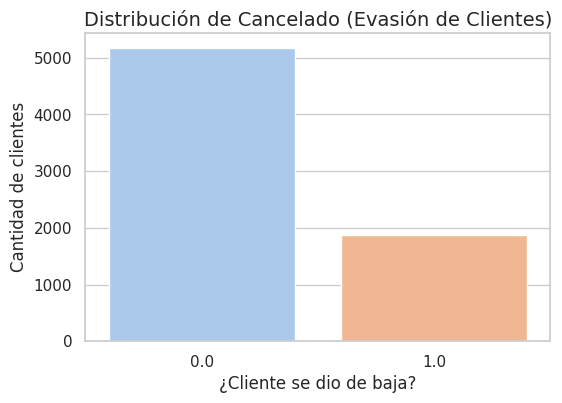

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo visual
sns.set(style="whitegrid")

# Conteo de valores de 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_telecom_final, x='Cancelado', palette='pastel')

# Etiquetas y título
plt.title('Distribución de Cancelado (Evasión de Clientes)', fontsize=14)
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.show()

In [34]:
# Conteo absoluto y relativo
print(df_telecom_final['Cancelado'].value_counts())
print(df_telecom_final['Cancelado'].value_counts(normalize=True))

Cancelado
0.0    5174
1.0    1869
Name: count, dtype: int64
Cancelado
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


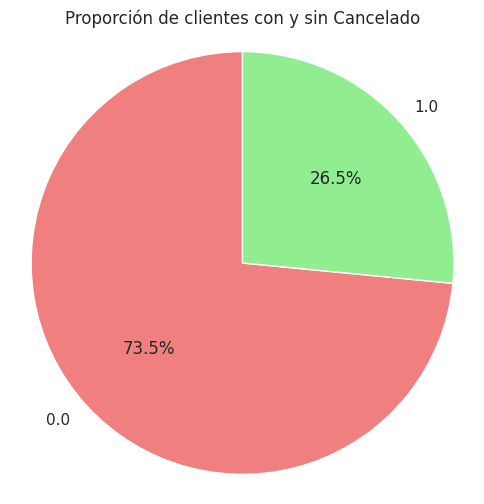

In [35]:
# Conteo de valores
churn_counts = df_telecom_final['Cancelado'].value_counts()

# Gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightgreen']
)
plt.title('Proporción de clientes con y sin Cancelado')
plt.axis('equal')
plt.show()

/tmp/ipython-input-2141349966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2141349966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2141349966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


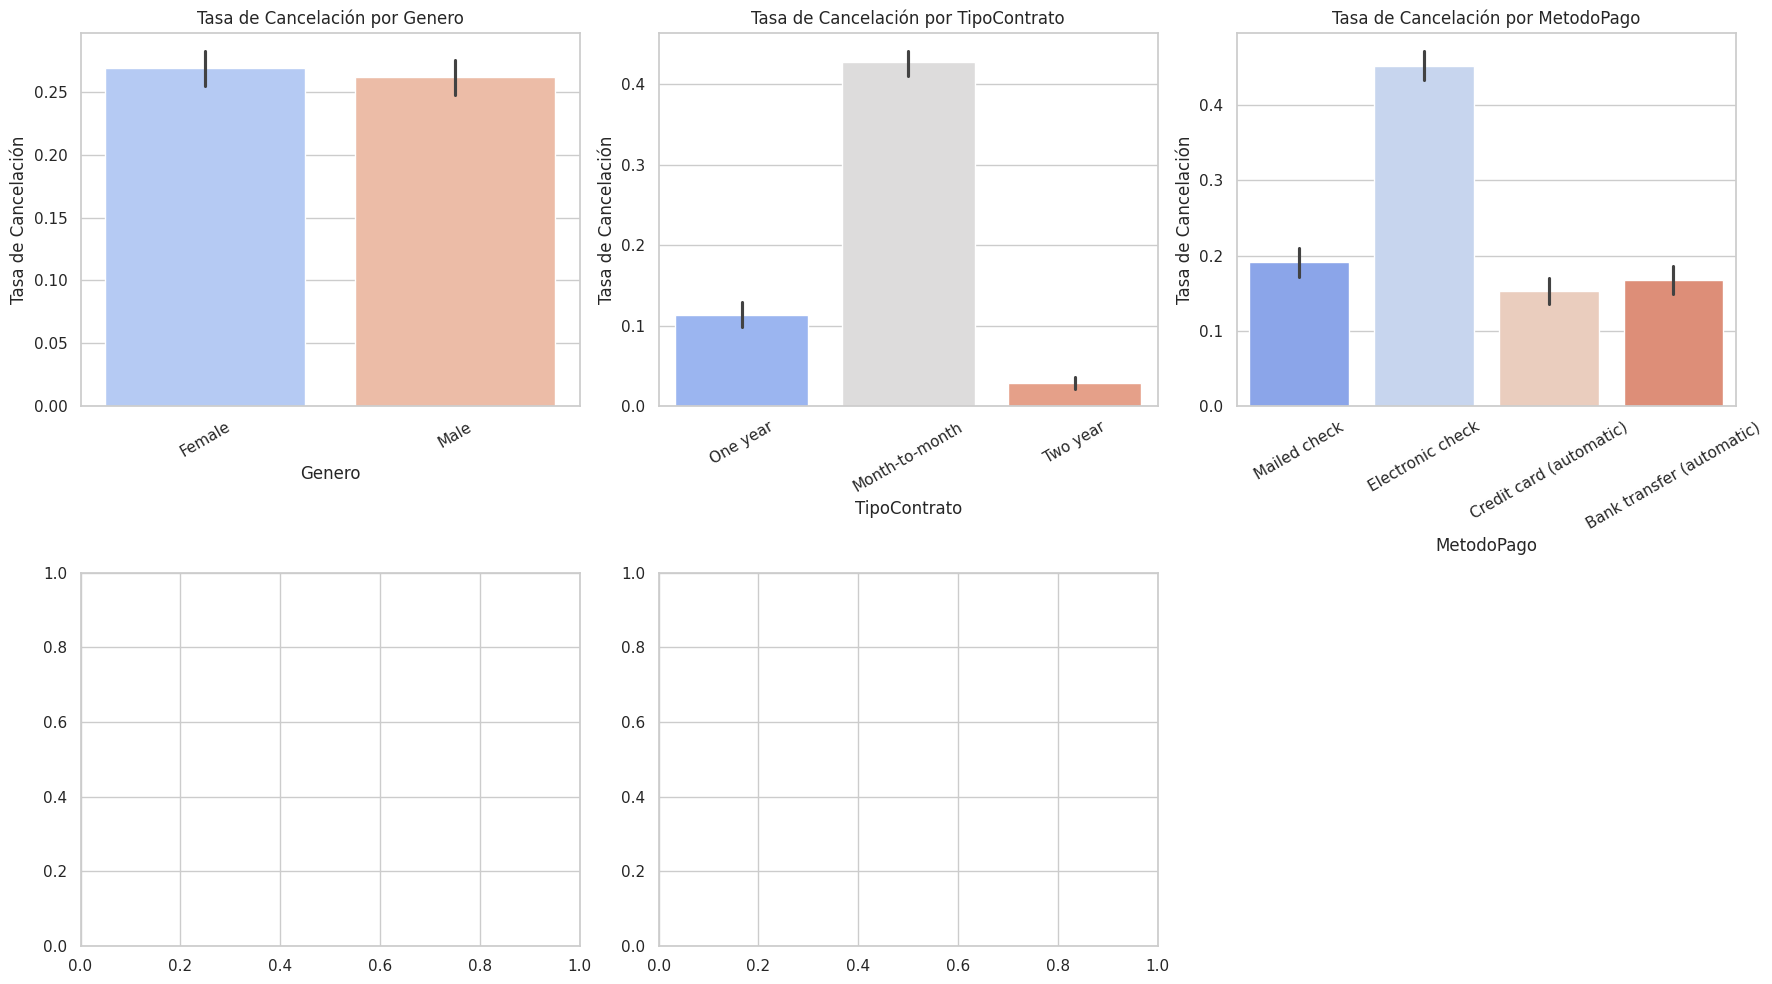

In [36]:
# Lista de variables categóricas a analizar
variables_categoricas = ['Genero', 'TipoContrato', 'MetodoPago', 'ServicioInternet', 'FacturacionElectronica']

# Ajustar estilo visual
sns.set(style="whitegrid")

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(variables_categoricas):
    if var in df_telecom_final.columns:
        ax = axes[i]
        sns.barplot(
            data=df_telecom_final,
            x=var,
            y='Cancelado',
            estimator=lambda x: sum(x) / len(x),  # tasa de cancelación
            palette='coolwarm',
            ax=ax
        )
        ax.set_title(f'Tasa de Cancelación por {var}')
        ax.set_ylabel('Tasa de Cancelación')
        ax.set_xlabel(var)
        ax.tick_params(axis='x', rotation=30)

# Eliminar gráfico vacío si sobran ejes
if len(variables_categoricas) < len(axes):
    for j in range(len(variables_categoricas), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

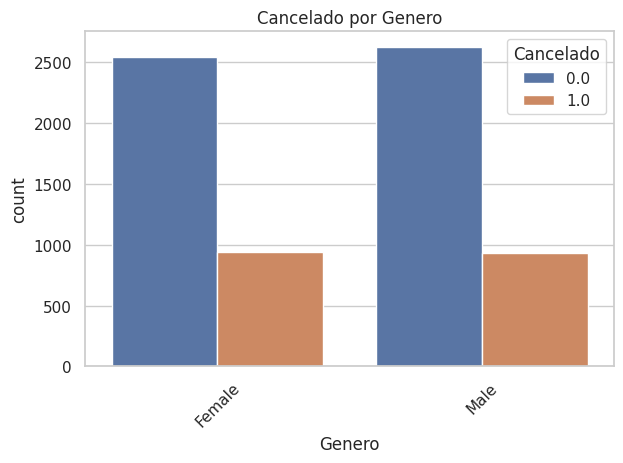

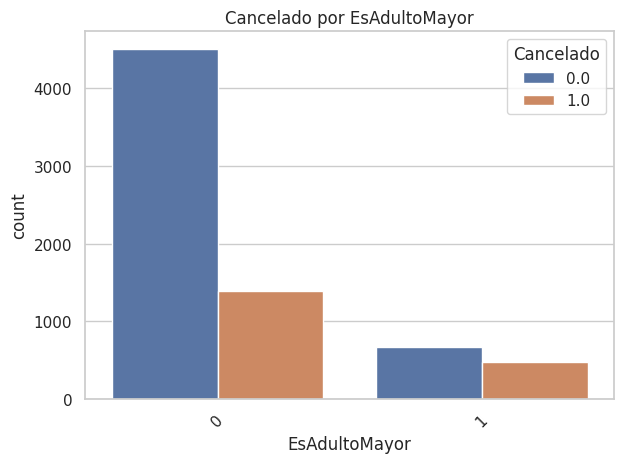

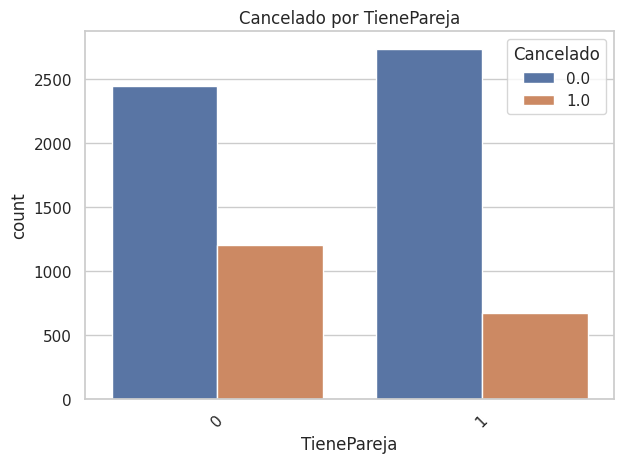

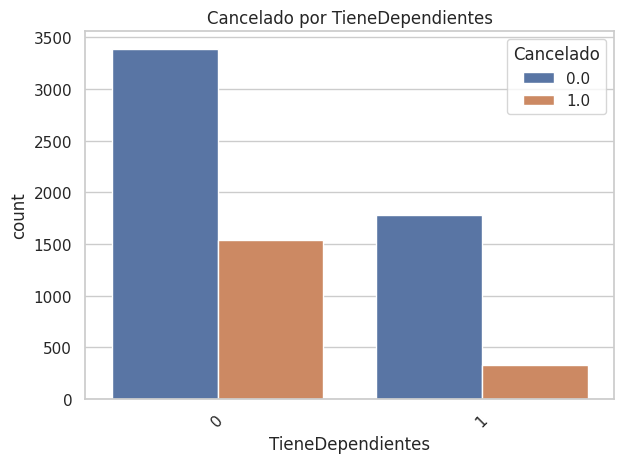

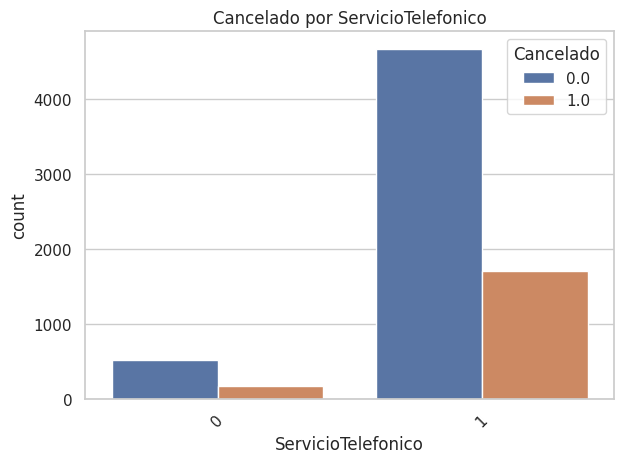

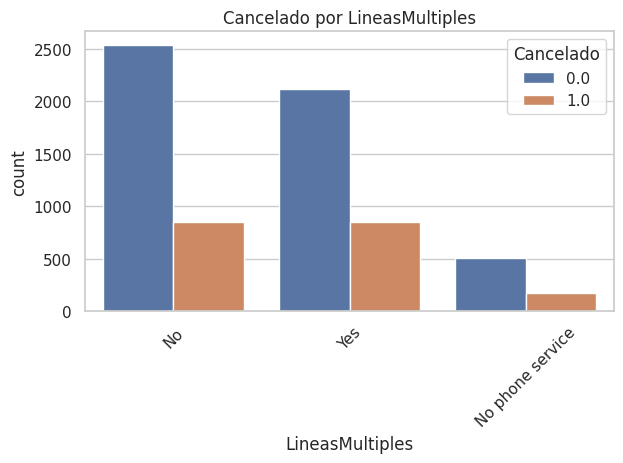

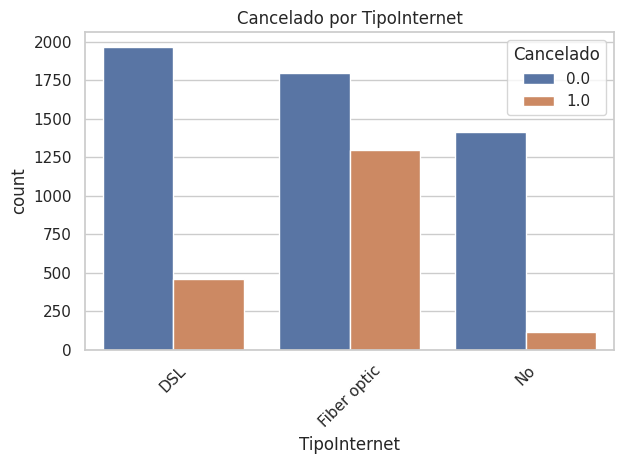

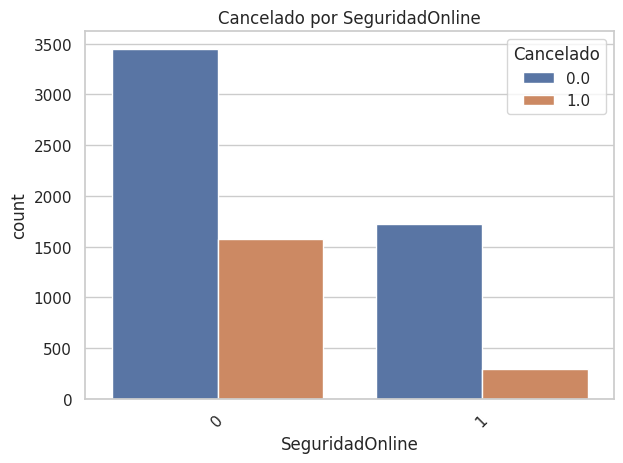

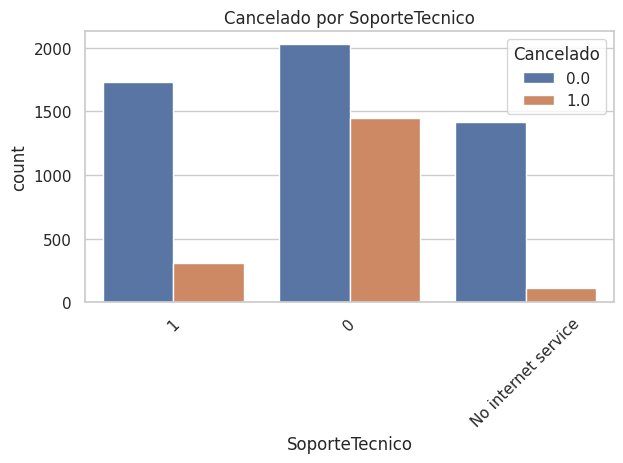

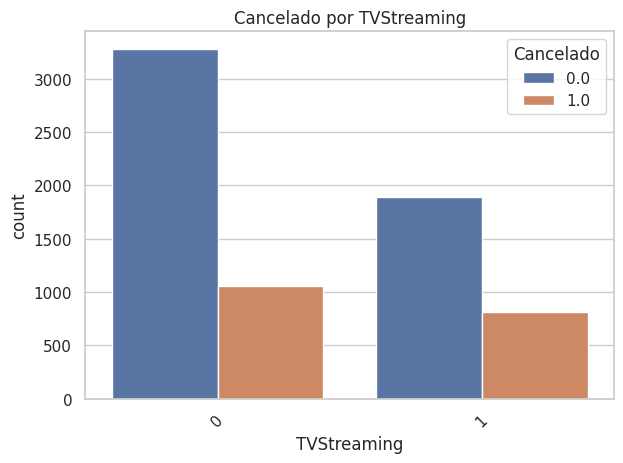

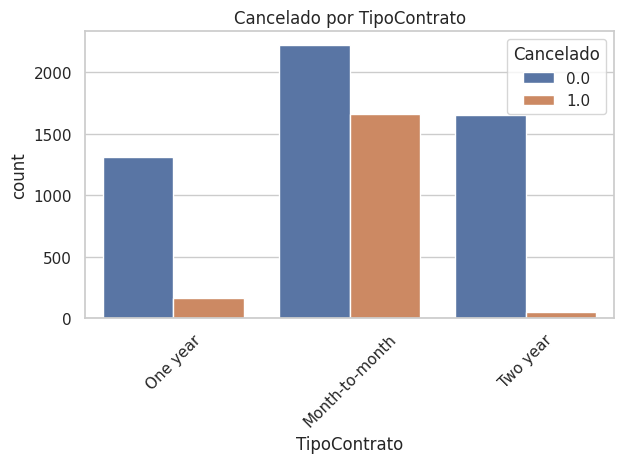

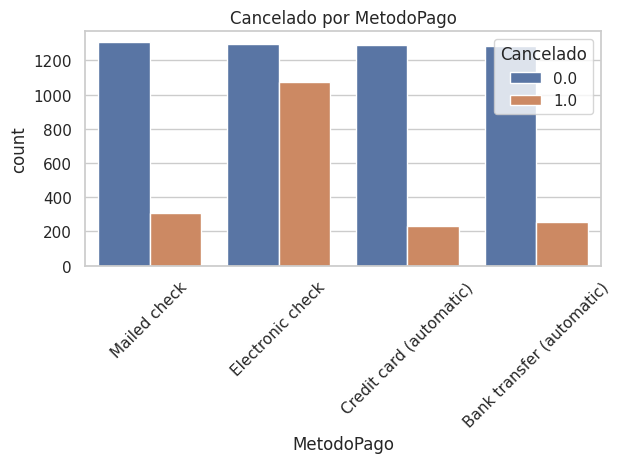

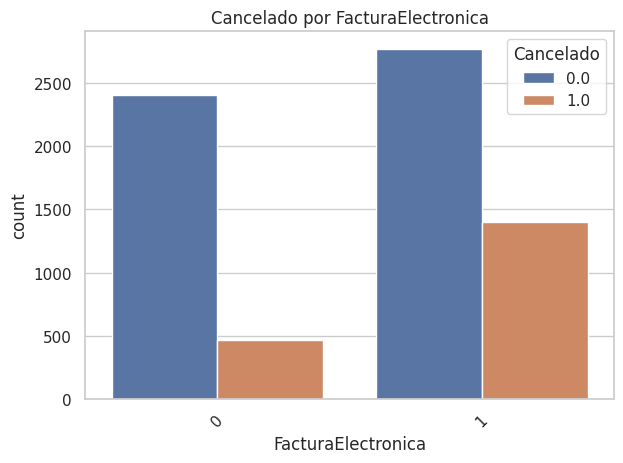

In [37]:
# Función para graficar varias variables categóricas vs churn
def churn_vs_categoricas(cols):
    for col in cols:
        sns.countplot(x=col, hue='Cancelado', data=df_telecom_final)
        plt.title(f'Cancelado por {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

categoricas = ['Genero', 'EsAdultoMayor', 'TienePareja', 'TieneDependientes', 'ServicioTelefonico',
               'LineasMultiples', 'TipoInternet', 'SeguridadOnline', 'SoporteTecnico',
               'TVStreaming', 'TipoContrato', 'MetodoPago', 'FacturaElectronica']
churn_vs_categoricas(categoricas)

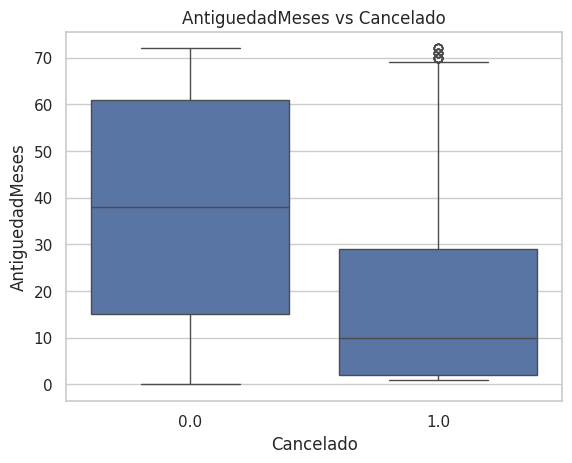

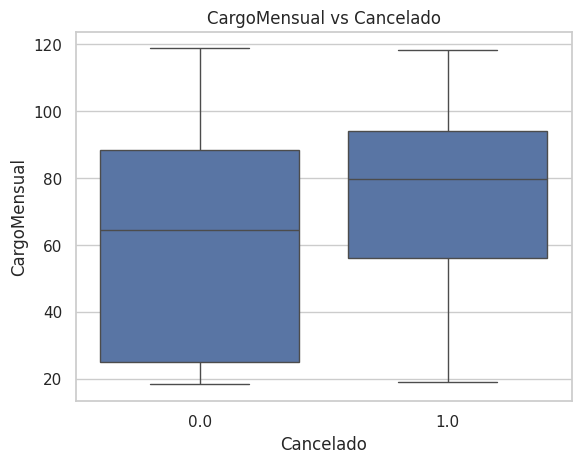

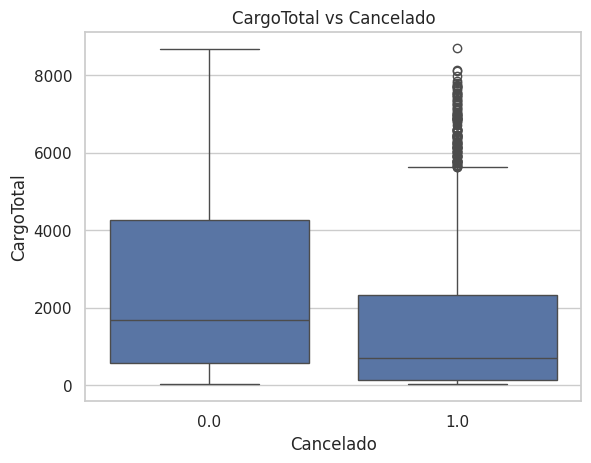

In [38]:
# Boxplot para ver diferencias de distribución
numericas = ['AntiguedadMeses', 'CargoMensual', 'CargoTotal']

for col in numericas:
    sns.boxplot(x='Cancelado', y=col, data=df_telecom_final)
    plt.title(f'{col} vs Cancelado')
    plt.show()

#📄Informe final

In [38]:
# Informe Final – Telecom X: Análisis de Evasión (Churn)

**Objetivo.** Comprender los factores asociados a la evasión de clientes del servicio de internet Telecom X para apoyar estrategias de retención y nutrir futuros modelos predictivos.

## Limpieza y Tratamiento de Datos se realizo lo siguiente
# - Se normalizaron las columnas que eran diccionarios para mejor manejo y ananlisis de los datos
# - Estandarización de la variable objetivo: conversión a binaria (0/1) en **{col_churn_es}**.
# - Revisión de consistencia lógica entre servicios (p.ej., Internet y add-ons).
# - Normalización de etiquetas categóricas cuando corresponde (contratos, métodos de pago, etc.).
# - Manejo de *missing values* en cargos totales para tenure=0 (clientes nuevos).

# Se realizo un analisis exploratorio de los datos a fines de identificar patrones, de lo cual surgieron las siguientes observaciones:
# - No se aprecia tendencia a laevasion de clientes por genero
# - Se aprecia que la evacion o cancelacion de los clientes esta fuertemente determinado por quienes tienen contrato mes a mes y por quienes pagan con chequera electronica
# - Se aprecia que la evacion o cancelacion se da mas en el tipo de internet por fibra optica y quienes tienen servicio telefonico


# insights
# - Los cargos totales entre 0 y 2000 tienen mas tasa de cancelacion
# - Los cargos mensuales mas altos entre 58 y 95 suelen tener mayor tasa de cancelacion
# - Las personas con antiguedad entre 2 meses y 28 meses son quienes mas ancelan el servicio

## Recomendaciones

# -**Retención temprana:** diseñar onboarding, descuentos iniciales o beneficios en los primeros meses si la fuga es temprana.
# -**Segmentación por precio:** revisar planes con cargos mensuales más altos; ofrecer **bundles** o valor agregado para reducir sensibilidad al precio.
# -**Alertas proactivas:** monitoreo de tickets/soporte y degradación de servicio (especialmente en clientes con Internet de alto costo).
# -**Fidelización por contrato:** incentivar contratos de mayor plazo con beneficios transparentes (evitar fricción al migrar).
# -**Optimizar métodos de pago:** ya que el método cheque electronico concentra más churn, revisar UX de cobro, recordatorios y fallas de pago.
